# Model Building:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('glassdoor_jobs_cleaned.csv')

In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'State', 'jobhq', 'age',
       'python_yn', 'r_yn', 'aws_yn', 'spark_yn', 'hadoop_yn', 'docker_yn',
       'sql_yn', 'linux_yn', 'flask_yn', 'django_yn', 'tensorflow_yn',
       'keras_yn', 'pytorch_yn', 'algo_yn', 'stats_yn', 'tableau_yn',
       'job_type', 'job_type_num', 'seniority', 'seniority_num', 'len_desc',
       'num_comp'],
      dtype='object')

For this model, only numerical values will be used to avoid any mismatch in data shape, when the user inputs data. It is possible to use one-hot encoding and passing on those encodings to the final application program to use categorical variables as well, but for now, the simplified model should suffice. 

In [4]:
df_model=df[['avg_salary','Rating','jobhq','age','num_comp',
             'python_yn', 'r_yn', 'aws_yn', 'spark_yn', 'hadoop_yn', 'docker_yn','sql_yn', 'linux_yn',
             'flask_yn', 'django_yn', 'tensorflow_yn','keras_yn', 'pytorch_yn', 'tableau_yn',
             'algo_yn', 'stats_yn','len_desc','job_type_num','seniority_num']]

In [5]:
df_model.head()

,avg_salary,Rating,jobhq,age,num_comp,python_yn,r_yn,aws_yn,spark_yn,hadoop_yn,...,django_yn,tensorflow_yn,keras_yn,pytorch_yn,tableau_yn,algo_yn,stats_yn,len_desc,job_type_num,seniority_num
0,85.0,4.2,0,52,0,0,0,0,0,1,...,0,0,0,0,0,1,1,3962,3,2
1,85.0,3.2,1,28,0,1,1,0,0,0,...,0,0,0,0,1,0,1,5358,3,2
2,85.0,2.9,1,5,0,1,1,0,0,0,...,0,0,0,0,0,0,1,3183,7,2
3,85.0,4.2,0,32,3,0,0,0,0,0,...,0,0,0,0,0,0,0,4218,1,2
4,85.0,3.8,0,16,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1833,7,2


### Get Dummy Data

In [6]:
df_dum=pd.get_dummies(df_model)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X=df_dum.drop('avg_salary',axis=1)
y=df_dum.avg_salary.values

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [10]:
X_test.head()

,Rating,jobhq,age,num_comp,python_yn,r_yn,aws_yn,spark_yn,hadoop_yn,docker_yn,...,django_yn,tensorflow_yn,keras_yn,pytorch_yn,tableau_yn,algo_yn,stats_yn,len_desc,job_type_num,seniority_num
644,4.9,0,-1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,5003,3,2
737,4.2,0,17,0,1,0,0,1,1,0,...,0,0,0,0,0,1,1,1446,3,2
3,4.2,0,32,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4218,1,2
905,3.6,0,132,0,1,0,0,1,1,0,...,0,0,0,0,0,1,1,3575,3,2
104,4.0,1,60,3,1,0,1,0,0,1,...,0,0,0,0,0,1,1,5242,2,2


In [11]:
X_test.columns

Index(['Rating', 'jobhq', 'age', 'num_comp', 'python_yn', 'r_yn', 'aws_yn',
       'spark_yn', 'hadoop_yn', 'docker_yn', 'sql_yn', 'linux_yn', 'flask_yn',
       'django_yn', 'tensorflow_yn', 'keras_yn', 'pytorch_yn', 'tableau_yn',
       'algo_yn', 'stats_yn', 'len_desc', 'job_type_num', 'seniority_num'],
      dtype='object')

### Multiple Linear Regression:

In [12]:
import statsmodels.api as sm

In [13]:
X_sm=X=sm.add_constant(X)

In [14]:
model=sm.OLS(y,X_sm)

In [15]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     2.665
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           3.80e-05
Time:                        23:22:00   Log-Likelihood:                -4432.4
No. Observations:                 940   AIC:                             8913.
Df Residuals:                     916   BIC:                             9029.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            94.8987      8.628     10.999      0.000      77.967     111.831
Rating            2.4616      1.501      1.640      0.101      -0.484       5.407
jobhq             0.4149      1.885      0.220      0.826      -3.285       4.115
age               0.0311      0.022      1.419      0.156      -0.012       0.074
num_comp         -0.0777      0.729     -0.107      0.915      -1.509       1.353
python_yn         4.9740      2.453      2.028      0.043       0.160       9.788
r_yn             -3.7256      2.071     -1.799      0.072      -7.791       0.339
aws_yn           -3.8923      2.298     -1.694      0.091      -8.402       0.617
spark_yn         -0.2601      2.796     -0.093      0.926      -5.747       5.227
hadoop_yn        -0.9683      2.778     -0.349      0.728      -6.421       4.484
docker_yn         0.6014      5.572      0.108      0.914     -10.335      11.537
sql_yn            2.3600      2.110      1.119      0.264      -1.781       6.501
linux_yn          5.0028      3.254      1.538      0.124      -1.383      11.388
flask_yn          9.1208      9.238      0.987      0.324      -9.010      27.251
django_yn         5.9560     10.294      0.579      0.563     -14.247      26.159
tensorflow_yn    -4.3551      3.701     -1.177      0.240     -11.619       2.909
keras_yn          1.5708      4.504      0.349      0.727      -7.269      10.410
pytorch_yn        5.5300      4.204      1.316      0.189      -2.720      13.780
tableau_yn       -2.5618      2.463     -1.040      0.299      -7.395       2.272
algo_yn           2.5754      2.063      1.248      0.212      -1.474       6.624
stats_yn          8.5982      2.272      3.785      0.000       4.140      13.056
len_desc         -0.0014      0.001     -2.307      0.021      -0.003      -0.000
job_type_num     -0.7919      0.645     -1.228      0.220      -2.058       0.474
seniority_num     2.3628      2.504      0.944      0.346      -2.551       7.276
==============================================================================
Omnibus:                       19.329   Durbin-Watson:                   0.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.394
Skew:                           0.229   Prob(JB):                     0.000454
Kurtosis:                       2.571   Cond. No.                     5.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [17]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error', cv=3))

-23.941355441378267

### Lasso Regression

In [19]:
lm_l=Lasso(alpha=.19)

In [20]:
lm_l.fit(X_train,y_train)

Lasso(alpha=0.19)

In [21]:
np.mean(cross_val_score(lm_l,X_train,y_train,scoring='neg_mean_absolute_error', cv=3))

-23.922359570336884

In [22]:
alpha=[]
error=[]

In [23]:
for i in range(1,100):
    alpha.append(i/100)
    lml=Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train,scoring='neg_mean_absolute_error', cv=3)))

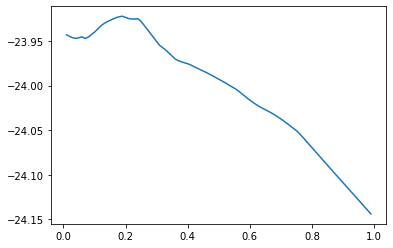

In [24]:
plt.plot(alpha,error)

In [25]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
18,0.19,-23.92236


### Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rf=RandomForestRegressor()

In [28]:
rf1=rf.fit(X_train,y_train)

In [29]:
np.mean(cross_val_score(rf1,X_train,y_train,scoring='neg_mean_absolute_error', cv=3))

-23.16726409552149

### Tune Models GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [31]:
X_train=preprocessing.scale(X_train)

In [32]:
parameters={'n_estimators':range(10,200,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

In [33]:
gs=GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3,n_jobs=-1)

In [34]:
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 200, 10)},
             scoring='neg_mean_absolute_error')

In [35]:
gs.best_score_

-22.428982486719786

In [36]:
gs.best_estimator_

RandomForestRegressor(criterion='mae', max_features='log2', n_estimators=80)

### Test Ensembles

In [37]:
tpred_lm=lm.predict(X_test)

In [38]:
tpred_lml=lm_l.predict(X_test)

In [39]:
tpred_rfgs=gs.best_estimator_.predict(X_test)

In [40]:
tpred_rf=rf1.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error

In [42]:
mean_absolute_error(y_test,tpred_lm)

23.29663420803251

In [43]:
mean_absolute_error(y_test,tpred_lml)

23.543162703332694

In [44]:
mean_absolute_error(y_test,tpred_rf)

22.788190561876064

In [45]:
mean_absolute_error(y_test,tpred_rfgs)

23.927726063829788

The Random Forest model seems to have the least error, so that's the model that will be chosen.

### Pickling (but using JobLib instead of Pickle)

In [46]:
import joblib

In [47]:
joblib.dump(rf1,'model.pkl')

['model.pkl']

In [48]:
model=joblib.load('model.pkl')

In [49]:
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

115.01046428571429

In [50]:
np.array(list(X_test.iloc[1,:]))

array([4.200e+00, 0.000e+00, 1.700e+01, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 1.000e+00, 1.446e+03, 3.000e+00, 2.000e+00])

In [51]:
type(np.array(list(X_test.iloc[1,:])))

numpy.ndarray